# 과제1

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

데이터 불러오기

In [3]:
data = fetch_california_housing()
X = data.data
y = data.target
feature_names = data.feature_names
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target
df.head()


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [4]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   target      20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


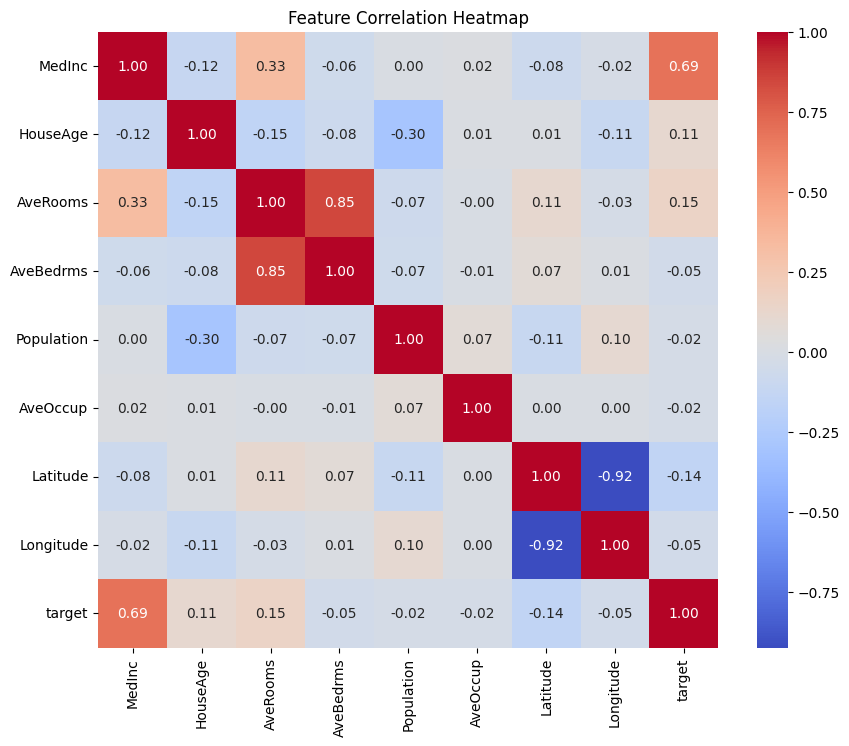

In [5]:
df['target'] = y

plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

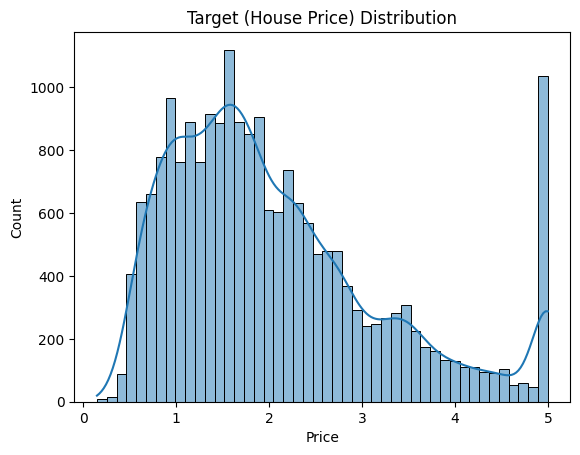

In [6]:
sns.histplot(df['target'], kde=True)
plt.title("Target (House Price) Distribution")
plt.xlabel("Price")
plt.ylabel("Count")
plt.show()

학습/테스트 분할, 데이터 표준화

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

SVR (RBF 커널)

In [8]:
svr_rbf = SVR(kernel='rbf', C=10, epsilon=0.2)
svr_rbf.fit(X_train_scaled, y_train)
y_pred_rbf = svr_rbf.predict(X_test_scaled)

SVR (Linear 커널)

In [9]:
svr_lin = SVR(kernel='linear', C=10)
svr_lin.fit(X_train_scaled, y_train)
y_pred_lin = svr_lin.predict(X_test_scaled)

비교 모델: 선형 회귀

In [10]:
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)
y_pred_lr = lr.predict(X_test_scaled)

SVR (RBF Kernel): MSE=0.3213, R²=0.7548
SVR (Linear Kernel): MSE=0.5793, R²=0.5580
Linear Regression: MSE=0.5559, R²=0.5758


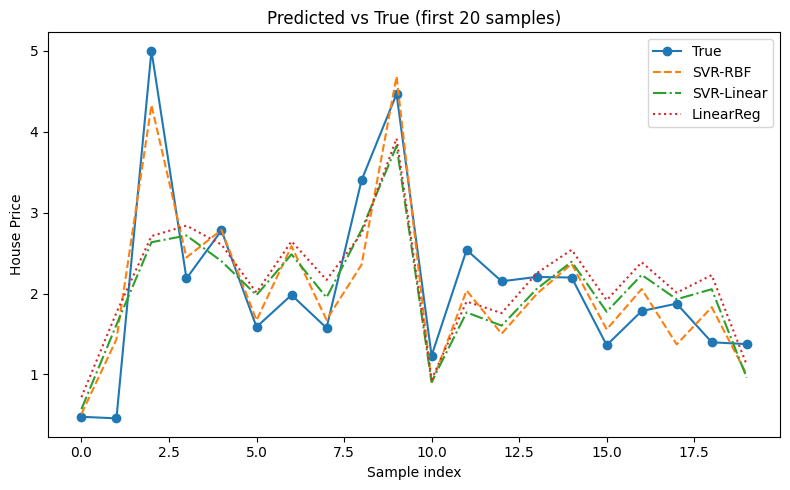

In [11]:
def evaluate(y_true, y_pred, name):
    mse = mean_squared_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    print(f"{name}: MSE={mse:.4f}, R²={r2:.4f}")

evaluate(y_test, y_pred_rbf, "SVR (RBF Kernel)") #
evaluate(y_test, y_pred_lin, "SVR (Linear Kernel)")
evaluate(y_test, y_pred_lr, "Linear Regression")

plt.figure(figsize=(8, 5))
plt.plot(y_test[:20], label='True', marker='o')
plt.plot(y_pred_rbf[:20], label='SVR-RBF', linestyle='--')
plt.plot(y_pred_lin[:20], label='SVR-Linear', linestyle='-.')
plt.plot(y_pred_lr[:20], label='LinearReg', linestyle=':')
plt.title("Predicted vs True (first 20 samples)")
plt.xlabel("Sample index")
plt.ylabel("House Price")
plt.legend()
plt.tight_layout()
plt.show()


문제1. 위 그래프와 MSE, R² 평가 지표를 바탕으로 세 모델(SVR-RBF, SVR-Linear, Linear Regression) 중에서 가장 예측 성능이 우수한 모델은 무엇인지 판단하고, 그 판단의 수치적·시각적 근거를 서술하세요.

-> 가장 성능이 좋은 모델은 SVR (RBF Kernel)
MSE를 고려했을 때 0.3212으로 세 모델 중 가장 낮고 R제곱 값을 고려했을 때도 0.7548로 세 모델 중 가장 높습니다.
-> 예측과 실제값 그래프에서 SVR-RBF 예측선이 실제값과 가장 잘 겹치고, 변동패턴을 잘 따라가는 것을 확인할 수 있습니다. 따라서 SVR_RBF 모델이 예측 성능이 가장 우수하다고 판단했습니다.

# 과제2

데이터 처리

In [26]:
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA

# 데이터 로드
iris = load_iris()
X = iris.data
y = iris.target
target_names = iris.target_names

# PCA로 2D 축소

X_std  = StandardScaler().fit_transform(X)
X_pca  = PCA(n_components=2).fit_transform(X_std)

# 2) DBSCAN에 넣을 포맷: (x, y) 숫자 튜플만
data = [tuple(map(float, row)) for row in X_pca]   # [(x, y), (x, y), ...]
# names = [f"pt{i}" for i in range(len(data))]    # 이름이 필요하면 따로 보관

DBSCAN 구현

In [27]:
import math
def get_distance(p1, p2):
    dx = p1[0] - p2[0]
    dy = p1[1] - p2[1]
    return math.sqrt(dx * dx + dy * dy)

def get_neighbors(data, index, eps):
    neighbors = []
    for i in range(len(data)):
        if get_distance(data[index], data[i]) <= eps:
            neighbors.append(i)
    return neighbors

def grow_cluster(data, labels, idx, neighbors, cluster_id, eps, min_pts):
    labels[idx] = cluster_id
    q = list(neighbors)
    i = 0
    while i < len(q):
        current = q[i]
        i += 1
        if labels[current] == -1:
            labels[current] = cluster_id
        elif labels[current] is None:
            labels[current] = cluster_id
            current_neighbors = get_neighbors(data, current, eps)
            if len(current_neighbors) >= min_pts:
                for nb in current_neighbors:
                    if nb not in q:
                        q.append(nb)

def dbscan(data, eps, min_pts):
    labels = [None] * len(data)
    cluster_num = 0

    for i in range(len(data)):
        if labels[i] is not None:
            continue
        nearby = get_neighbors(data, i, eps)
        if len(nearby) < min_pts:
            labels[i] = -1
        else:
            grow_cluster(data, labels, i, nearby, cluster_num, eps, min_pts)
            cluster_num += 1

    return labels


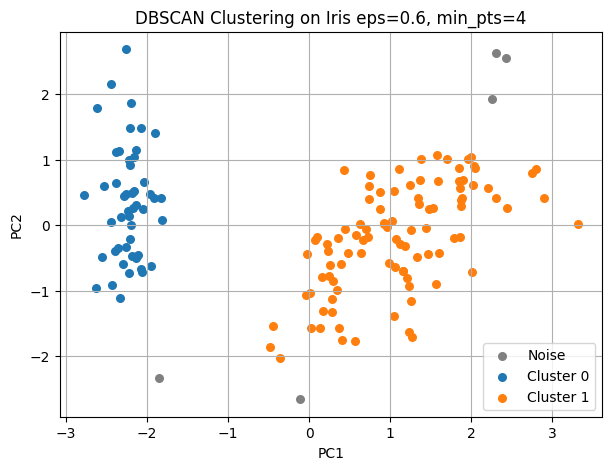

Adjusted Rand Index (ARI): 0.5482


In [29]:
eps = 0.6
min_pts = 4
labels = dbscan(data, eps, min_pts)

# data가 [(x, y), (x, y), ...] 라면
X_arr = np.array([[p[0], p[1]] for p in data], dtype=float)

unique_labels = sorted(set(labels))
cmap = plt.colormaps.get_cmap('tab10')

plt.figure(figsize=(7, 5))
for label in unique_labels:
    color = 'gray' if label == -1 else cmap(label % cmap.N)
    name = 'Noise' if label == -1 else f'Cluster {label}'
    cluster_points = X_arr[np.array(labels) == label]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=name, s=30, c=[color])

plt.legend()
plt.title(f"DBSCAN Clustering on Iris eps={eps}, min_pts={min_pts}")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.grid(True)
plt.show()


from sklearn.metrics import adjusted_rand_score

# ARI 계산
score = adjusted_rand_score(y, labels)
print(f"Adjusted Rand Index (ARI): {score:.4f}")


 K-Means 클러스터링

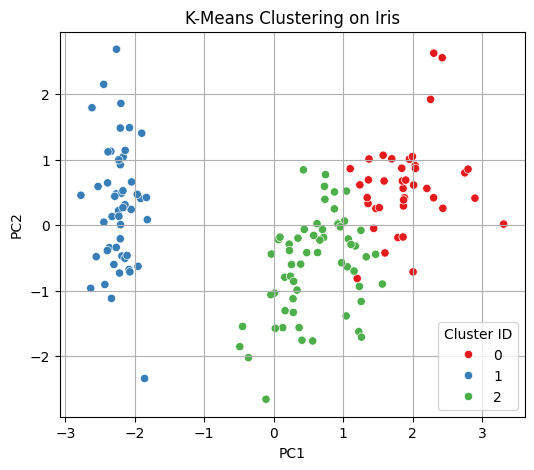

Adjusted Rand Index (ARI): 0.7163


In [30]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=42, n_init='auto')
labels = kmeans.fit_predict(X)


plt.figure(figsize=(6, 5))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=labels, palette="Set1")
plt.title("K-Means Clustering on Iris")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend(title="Cluster ID")
plt.grid(True)
plt.show()


# ARI 계산
score = adjusted_rand_score(y, labels)
print(f"Adjusted Rand Index (ARI): {score:.4f}")

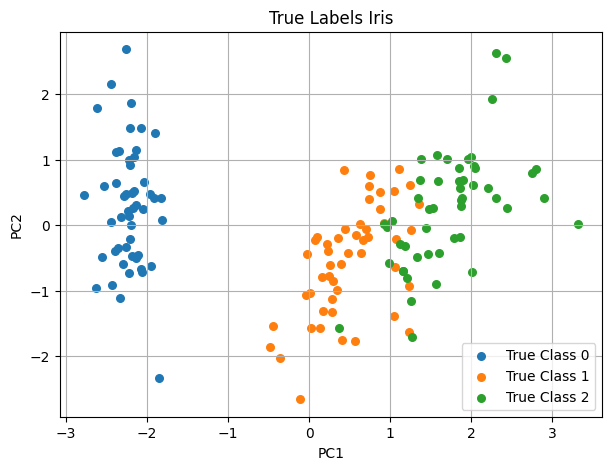

In [31]:
#True labels
plt.figure(figsize=(7, 5))
for class_id in np.unique(y):
    class_points = X_pca[y == class_id]
    plt.scatter(class_points[:, 0], class_points[:, 1], label=f"True Class {class_id}", s=30)

plt.legend()
plt.title("True Labels Iris")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.grid(True)
plt.show()


문제2. DBSCAN, K-Means, 실제 라벨에 대한 시각화 결과와 ARI 지표 결과를 바탕으로 어떤 클러스터링 알고리즘이 더 정확하게 분류했다고 판단할 수 있는지 설명하고, ARI 지표가 의미하는 바를 함께 서술하세요.
->
DBSCAN과 K-Means의 시각화 결과와 ARI 지표를 비교했을 때, ARI 값이 더 높은 알고리즘이 실제 라벨과의 군집 일치도가 높다고 판단할 수 있습니다. ARI(Adjusted Rand Index)는 0~1 범위를 가지며, 1은 완벽히 동일한 군집, 0은 무작위 군집, 음수는 무작위보다 못한 군집을 의미합니다. 시각적으로도 ARI가 높은 모델은 실제 라벨 분포와 군집 경계가 잘 맞고, 다른 클래스와 혼합되는 영역이 적습니다. 따라서 ARI 값이 더 높은 알고리즘이 실제 데이터 구조를 더 정확히 반영했다고 판단할 수 있습니다.

문제3. 두 클러스터링 알고리즘(DBSCAN과 K-Means)이 서로 다른 결과를 보인 이유를, 알고리즘의 작동 원리와 특성의 차이를 중심으로 서술하시오.
-> 두 알고리즘의 결과가 다른 이유는 작동원리와 군집 가정의 차이 때문입니다.
K-MEANS : 사전에 지정한 군집 수 k를 기준으로, 각 점을 가장 가까운 중심에 할당하고 중심을 갱신하며 원형의 군집을 형성합니다.
DBSCAN : 반경과 최소 포인트 수를 기준으로 밀도 기반으로 군집을 확장합니다. 임의의 형태의 군집을 찾을 수 있고, 이상치는 별도의 노이즈로 분류합니다. 그러나 파라미터 선택에 따라 결과가 크게 변합니다.
이러한 특성 때문에 데이터의 분포가 밀집 영역과 희박 영역을 모두 포함하거나 군집 형태가 구형이 아닐 경우 DBSCAN이 더 적합하며, 반대로 데이터가 균일하게 분포된 구형 군집일 경우 K-MEANS가 더 잘 작동합니다.